In [ ]:
# JOSH
# 1. What are the most popular metro transit stations? Defined by volume of "ons" & "offs"
    # Img 1.1 is heatmap routes
    # Img 1.2 is heatmap w/ top 5 pins dropped on the map

# KARIM
# 2. What part of the week sees the highest level of metro transit traffic?
    # Img 2.1 is bar chart
    # Img 2.2 heatmap showing the highest level day (Saturday "ons")

# ZOEY
# 3. What is the relationship between station "ons" & "offs"
    # Img 3.1 scatterplot of single station "ons" vs. "offs"
    # Img 3.2 stasticial analysis 

# OPTIONAL -- IF WE GET TO IT    
# 4. Does the Vikings' success correlate to Lightrail traffic ("ons")?
    # 

In [1]:
%matplotlib notebook

# Dependencies
import gmaps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Save file path to variable
metrotransit_csv = "TransitStopsBoardingsAndAlightings2019.csv"

# Read with Pandas
metrotransit_df = pd.read_csv(metrotransit_csv)
metrotransit_df["Route Classification"].unique()

array(['Core Local', 'Supporting Local', 'Commuter Express', 'Special',
       'Suburban Local', 'BRT', 'LRT', 'Commuter Rail', nan], dtype=object)

In [13]:
Route_df = metrotransit_df.groupby("Route Type")
Route_df.count()

,Provider,Route Classification,Route,Dir,Site_id,Geo_Node_Name,Group ID,latitude,longitude,x-coordinate,...,City,Trips,Obs Trips,Schedule,Ons,Offs,Seq,%Sampled,Downtown,Comment
Route Type,,,,,,,,,,,,,,,,,,,,,
Express,7546,7546,7546,7532,7546,7546,93,7546,7546,7546,...,7546,7546,5795,7546,5809,5795,7546,6698,7546,38
Suburban Local,8321,8321,8321,8321,8321,8321,228,8321,8321,8321,...,8321,8321,6373,8321,6373,6373,8321,8279,8321,71
Urban Local,23252,23252,23252,23126,23252,23252,348,23252,23252,23252,...,23252,23252,23093,23252,23093,22967,23252,23252,23252,292


In [3]:
schedule_df = metrotransit_df.groupby("Schedule")
schedule_df.count()

,Provider,Route Type,Route Classification,Route,Dir,Site_id,Geo_Node_Name,Group ID,latitude,longitude,...,y-coordinate,City,Trips,Obs Trips,Ons,Offs,Seq,%Sampled,Downtown,Comment
Schedule,,,,,,,,,,,,,,,,,,,,,
Saturday,9313,9313,9313,9313,9271,9313,9313,175,9313,9313,...,9313,9313,9313,8923,8923,8881,9313,9313,9313,100
Sunday,7496,7496,7496,7496,7454,7496,7496,152,7496,7496,...,7496,7496,7496,7106,7106,7064,7496,7496,7496,73
Weekday,22303,22303,22303,22303,22254,22303,22303,341,22303,22303,...,22303,22303,22303,19232,19239,19190,22303,21413,22303,228
Weekend,7,7,7,7,0,7,7,1,7,7,...,7,7,7,0,7,0,7,7,7,0


In [4]:
core_local_df = metrotransit_df.loc[metrotransit_df["Route Classification"]=="Core Local"]
core_local_df.head()

,Provider,Route Type,Route Classification,Route,Dir,Site_id,Geo_Node_Name,Group ID,latitude,longitude,...,City,Trips,Obs Trips,Schedule,Ons,Offs,Seq,%Sampled,Downtown,Comment
0,Metro Transit,Urban Local,Core Local,2,East,51581.0,HENNEPIN AVE & FRANKLIN AVE / 22ND ST,NaN,44.961886,-93.292079,...,MINNEAPOLIS,92.0,92.0,Weekday,75,8.0,1.0,100%,N,NaN
1,Metro Transit,Urban Local,Core Local,2,East,1099.0,HENNEPIN AVE S & 22ND ST W,NaN,44.961030,-93.292777,...,MINNEAPOLIS,92.0,92.0,Weekday,33,2.0,2.0,100%,N,NaN
2,Metro Transit,Urban Local,Core Local,2,East,13340.0,DUPONT AVE & FRANKLIN AVE W,NaN,44.962534,-93.293016,...,MINNEAPOLIS,92.0,92.0,Weekday,17,1.0,3.0,100%,N,NaN
3,Metro Transit,Urban Local,Core Local,2,East,13337.0,FRANKLIN AVE W & HENNEPIN AVE S,NaN,44.962630,-93.291123,...,MINNEAPOLIS,92.0,92.0,Weekday,177,2.0,4.0,100%,N,NaN
4,Metro Transit,Urban Local,Core Local,2,East,56705.0,FRANKLIN AVE W & LYNDALE AVE S,NaN,44.962642,-93.287697,...,MINNEAPOLIS,92.0,92.0,Weekday,143,4.0,5.0,100%,N,NaN


<IPython.core.display.Javascript object>


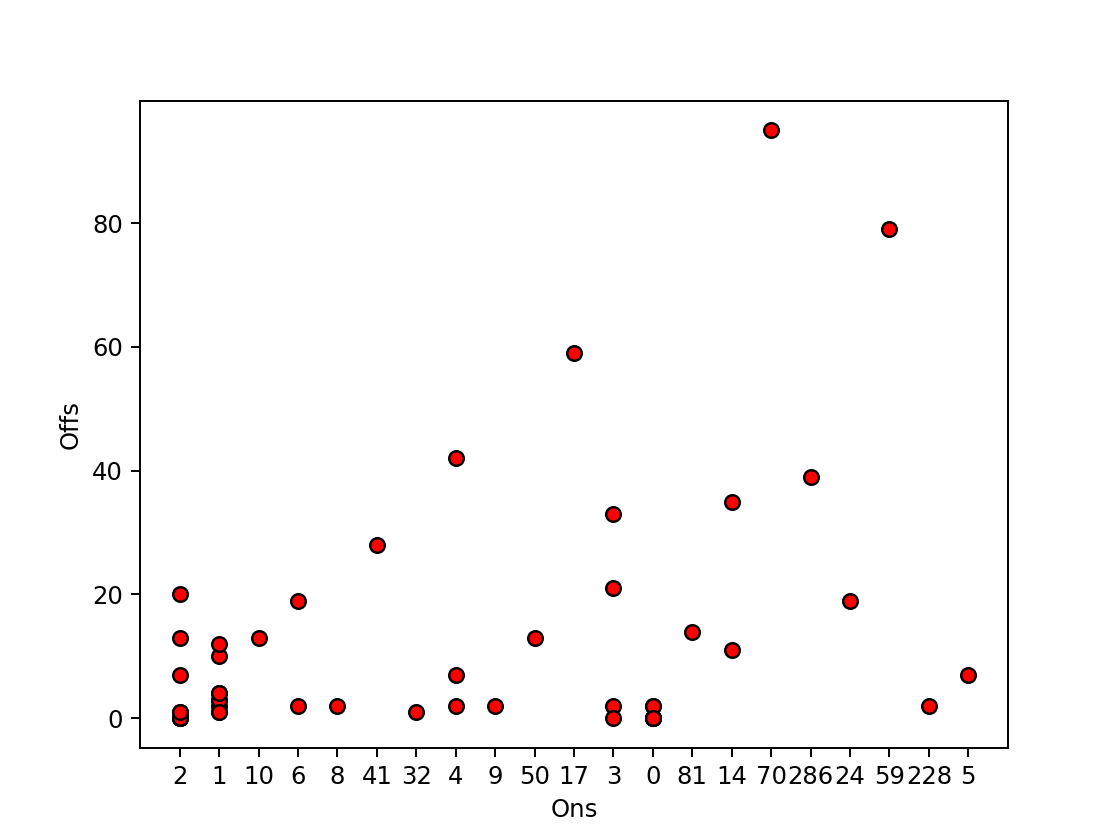

<function matplotlib.pyplot.show(*args, **kw)>

In [9]:
sample_core_local_df = core_local_df.sample(n = 50)

ons = sample_core_local_df["Ons"]
offs = sample_core_local_df["Offs"]

plt.scatter(ons, offs, marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Ons")
plt.ylabel("Offs")
plt.show

In [14]:
# core_local_df_clean = core_local_df.dropna()

# Store latitude and longitude in locations
locations = core_local_df[["latitude", "longitude"]].astype(float)

# Fill NaN values and convert to float
volume = core_local_df["Ons"].astype(float)

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=volume, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=.0012)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
# Correlation analysis comparing "ons" & "offs" for Core Local Routes


In [21]:
# ID top five ons
top5_ons = core_local_df.nlargest(5, ["Ons"]).astype(int)

# ID top five offs
# top5_offs = core_local_df.nlargest(5, ["Offs"])


TypeError: Column 'Ons' has dtype object, cannot use method 'nlargest' with this dtype

In [17]:
# Pins on the map to answer what are the most popular "ons" & "offs"

info_box_template = """
<dl>
<dt>Name</dt><dd>{Geo_Node_Name}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
core_local_top5 = [info_box_template.format(**row) for index, row in core_local_df.iterrows()]
top5 = core_local_df[["latitude", "longitude"]]


KeyboardInterrupt: 

In [ ]:
# Add marker layer ontop of heat map
markers = gmaps.marker_layer(top5, info_box_content=core_local_top5)
fig.add_layer(markers)

# Display figure
fig

In [7]:
LRT_df = metrotransit_df.loc[metrotransit_df["Route Classification"]=="LRT"]
LRT_df.head()

,Provider,Route Type,Route Classification,Route,Dir,Site_id,Geo_Node_Name,Group ID,latitude,longitude,...,City,Trips,Obs Trips,Schedule,Ons,Offs,Seq,%Sampled,Downtown,Comment
22201,Metro Transit,Urban Local,LRT,Blue Line,NaN,51405.0,MOA TRANSIT STATION,MAAM,44.854277,-93.238877,...,BLOOMINGTON,220.0,220.0,Weekday,"2,686",NaN,1.0,100%,N,New MOA transit station
22202,Metro Transit,Urban Local,LRT,Blue Line,NaN,51437.0,28TH AVE STATION,NaN,44.855876,-93.231499,...,BLOOMINGTON,220.0,220.0,Weekday,"1,000",NaN,2.0,100%,N,NaN
22203,Metro Transit,Urban Local,LRT,Blue Line,NaN,51436.0,BLOOMINGTON CENTRAL STATION,NaN,44.856369,-93.226485,...,BLOOMINGTON,220.0,220.0,Weekday,229,NaN,3.0,100%,N,NaN
22204,Metro Transit,Urban Local,LRT,Blue Line,NaN,53280.0,AMERICAN BLVD 34TH AVE STATION,NaN,44.859536,-93.223109,...,BLOOMINGTON,220.0,220.0,Weekday,269,NaN,4.0,100%,N,NaN
22205,Metro Transit,Urban Local,LRT,Blue Line,NaN,51435.0,TERMINAL 2 HUMPHREY STATION,NaN,44.874119,-93.224068,...,FORT SNELLING,221.0,221.0,Weekday,"2,250",NaN,5.0,100%,N,NaN


In [11]:
LRT_clean_df = LRT_df.dropna()
LRT_clean_df["Ons"] = LRT_clean_df["Ons"].str.replace(",", "")
# LRT_clean_df["Ons"] = LRT_clean_df["Ons"].astype(int)

# Store latitude and longitude in locations
locations_LRT = LRT_clean_df[["latitude", "longitude"]].astype(float)

# Fill NaN values and convert to float
volume = LRT_clean_df["Ons"].astype(float)

# Plot Heatmap
fig_LRT = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations_LRT, weights=volume, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=.0013)


# Add layer
fig_LRT.add_layer(heat_layer)

# Display figure
fig_LRT

TraitError: The 'locations' trait of a WeightedHeatmap instance must be of length 1 <= L <= 9223372036854775807, but a value of [] was specified.